In [1]:
import pandas as pd
import os
from pathlib import Path

PROJECT_ROOT = Path(os.environ["PROJECT_ROOT"])
from auxiliary.static_data import *
from auxiliary.auxiliary_funcs import *
from auxiliary.impute_missing_values import df_new_house_transactions

Added 999 missing rows. Final shape: (6432, 13)


In [10]:
df_new_house_transactions_per_sector = pd.read_csv(
    os.path.join(PROJECT_ROOT, "train", "new_house_transactions_per_sector.csv")
)

In [20]:
numerical_columns = ['sector ' + str(i) + '_new_house_transaction_amount' for i in range(1,97)]
numerical_columns += ['total_new_house_transaction_amount']

In [ ]:
df_new_house_transactions_per_sector[numerical_columns].iloc[-12:].corr()['total_new_house_transaction_amount']# correlations during past year


sector 1_new_house_transaction_amount     0.420095
sector 2_new_house_transaction_amount     0.390585
sector 3_new_house_transaction_amount     0.291842
sector 4_new_house_transaction_amount     0.855697
sector 5_new_house_transaction_amount     0.611995
                                            ...   
sector 93_new_house_transaction_amount    0.340951
sector 94_new_house_transaction_amount    0.389445
sector 95_new_house_transaction_amount         NaN
sector 96_new_house_transaction_amount    0.056828
total_new_house_transaction_amount        1.000000
Name: total_new_house_transaction_amount, Length: 97, dtype: float64

In [ ]:
#correlations two years ago. the values are not at all stable compared to the past year.
df_new_house_transactions_per_sector[numerical_columns].iloc[-24:(-12)].corr()['total_new_house_transaction_amount']

sector 1_new_house_transaction_amount     0.193929
sector 2_new_house_transaction_amount     0.576792
sector 3_new_house_transaction_amount     0.411155
sector 4_new_house_transaction_amount     0.636544
sector 5_new_house_transaction_amount     0.198541
                                            ...   
sector 93_new_house_transaction_amount   -0.222085
sector 94_new_house_transaction_amount    0.442151
sector 95_new_house_transaction_amount         NaN
sector 96_new_house_transaction_amount         NaN
total_new_house_transaction_amount        1.000000
Name: total_new_house_transaction_amount, Length: 97, dtype: float64

In [27]:
df_new_house_transactions_per_sector[numerical_columns].iloc[-12:].mean()/df_new_house_transactions_per_sector['total_new_house_transaction_amount'].iloc[-12:].mean()

sector 1_new_house_transaction_amount     0.004743
sector 2_new_house_transaction_amount     0.002900
sector 3_new_house_transaction_amount     0.006862
sector 4_new_house_transaction_amount     0.030252
sector 5_new_house_transaction_amount     0.001062
                                            ...   
sector 93_new_house_transaction_amount    0.008328
sector 94_new_house_transaction_amount    0.011736
sector 95_new_house_transaction_amount    0.000000
sector 96_new_house_transaction_amount    0.000020
total_new_house_transaction_amount        1.000000
Length: 97, dtype: float64

In [29]:
df_new_house_transactions_per_sector[numerical_columns].iloc[-24:(-12)].mean()/df_new_house_transactions_per_sector['total_new_house_transaction_amount'].iloc[-24:(-12)].mean()

sector 1_new_house_transaction_amount     0.013307
sector 2_new_house_transaction_amount     0.005730
sector 3_new_house_transaction_amount     0.009286
sector 4_new_house_transaction_amount     0.027063
sector 5_new_house_transaction_amount     0.000675
                                            ...   
sector 93_new_house_transaction_amount    0.014752
sector 94_new_house_transaction_amount    0.012457
sector 95_new_house_transaction_amount    0.000000
sector 96_new_house_transaction_amount    0.000000
total_new_house_transaction_amount        1.000000
Length: 97, dtype: float64

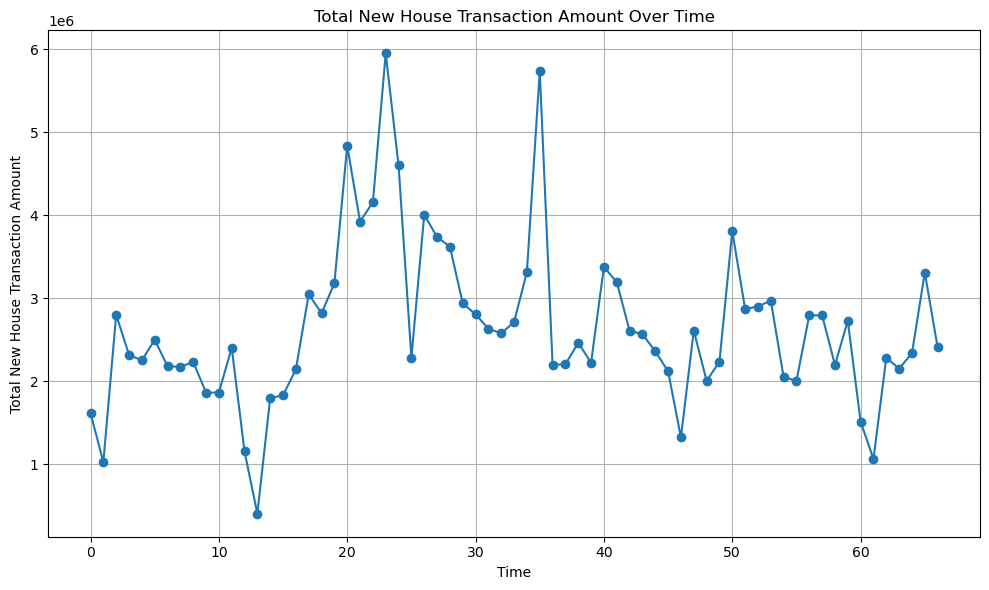

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    df_new_house_transactions_per_sector.index,
    df_new_house_transactions_per_sector['total_new_house_transaction_amount'],
    marker='o'
)
plt.xlabel('Time')
plt.ylabel('Total New House Transaction Amount')
plt.title('Total New House Transaction Amount Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()